<a href="https://colab.research.google.com/github/evany24/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**<br>
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

Deleted unnecessary columns.
Deleted duplicate rows.
Identified and addressed missing values.
Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
Produced univariate visuals for the target and all features.
Identified outliers.
Clearly commented all of your cleaning steps and described any decisions you made.
Commit your file to your Github repository and submit the link below. 

#Stroke Dataset

## About the Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 - *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
- 12) stroke: 1 if the patient had a stroke or 0 if not


*   Source: Kaggle Stroke Prediction Dataset
*   Data: [Stroke Prediction CSV](https://github.com/evany24/Stroke-Prediction/blob/main/healthcare-dataset-stroke-data.csv)



**Target:** Stroke or no stroke

**What does one row represent?** A person

**Is this a classification or regression problem?** Classification

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df_stroke = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**How many features does the data have? How many rows?**

In [3]:
#display rows and columns
df_stroke.shape
print(f'There are {df_stroke.shape[0]} rows and {df_stroke.shape[1]} columns')
print(f'The {df_stroke.shape[0]} rows represent the data values of the features and target.\nThe columns represent {df_stroke.shape[1]-1} features and the target stroke.')

There are 5110 rows and 12 columns
The 5110 rows represent the data values of the features and target.
The columns represent 11 features and the target stroke.


In [4]:
#target column numbers
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
#missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#duplicates
df_stroke.duplicated().sum()

0

**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?** 
- There weight for the target column is highly favorable to the 0 or no stroke. This will present a challenge to try and balance the data to get the best model to predict a stroke. We will also have to deal with the missing values in the bmi column.

## Clean Data

### Delete unnecessary columns


id is unnecessary to keep for our purposes, there are too many unique values

In [7]:
# drop id column
df_stroke.drop(['id'], axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


- The id column has been removed

### **Inspect Column Datatypes for Errors**

In [8]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
## Display column names and datatypes
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The datatypes for each column match the data dictionary

### **Inspect Column Names for Errors**

In [10]:
## Display column names
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- We will rename 'Residence_type' to 'residence_type' to match the other column names.


In [11]:
#rename Residence_type column
df_stroke.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [12]:
#check changes
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- All column types are now consistent

### **Inspect Values for Errors**

#### **Numeric Columns**

In [13]:
# View the numberic statistics for columns contain numberical values
df_stroke.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- .80 seems like a low value for age but let's look into it

Locate rows with age values equal to .80

In [14]:
# display rows with age equal to .08
df_stroke[df_stroke['age'] == .08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


Check other age values to see if there are similar low values

In [15]:
# create a filter for age being less than 1
stroke_age = df_stroke['age'] < 1
df_stroke[stroke_age]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


- There are many rows where age values less than 1. We now know that this is not inconsistent numerical data.

**All the numerical data is consistent**

#### Categorical Columns

In [16]:
#Display object columns
dtypes = df_stroke.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





Let us change the naming convention for 'work type' so that all values start with a capital letter

In [18]:
# change children to Children
df_stroke['work_type'].replace({'children':'Children'}, inplace=True)
df_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Change the naming convention for 'smoking_status' values to start with a capital letter and use an underscore for spaces.

In [19]:
# change never smoked to Never_smoked, formerly smoked to Formerly_smoked and smokes to Smokes
df_stroke['smoking_status'].replace({'never smoked':'Never_smoked', 'formerly smoked':'Formerly_smoked', 'smokes':'Smokes'}, inplace=True)
df_stroke['smoking_status'].value_counts()

Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64

Recheck object columns

In [20]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64





- Categorical values are now consistent

### Check for duplicate rows

In [21]:
#check for duplicates
df_stroke.duplicated().sum()

0

- There are no duplicate values

In [22]:
#missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- There are 201 missing values in the bmi column, we will impute these values with SimpleImputer after splitting the data to avoid data leakage. We will most likely use the mean or median because the data is a float value and not an integer.

### Check for missing values

In [23]:
# numeric columns
df_stroke.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Exploratory Data Analysis

#### Univariate Models

##### Numeric Columns

###### **Age**

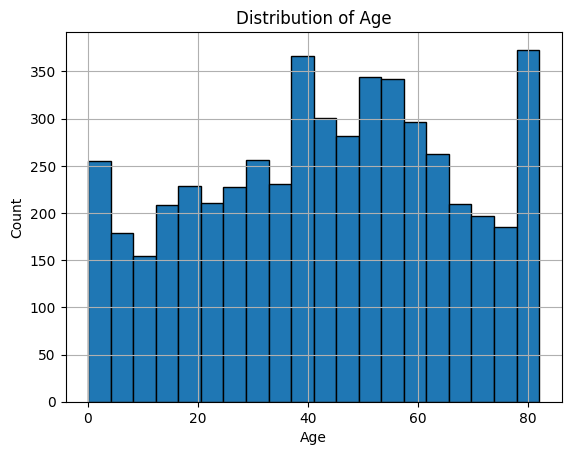

In [24]:
# Histogram of Age
ax = df_stroke['age'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count');

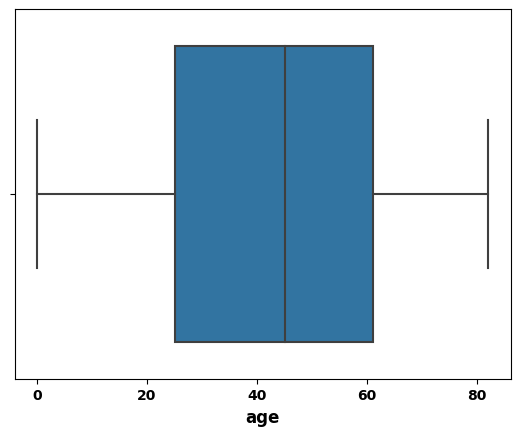

In [25]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'age')
ax.set_xlabel('age', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- Age is pretty evenly distributed and doesn't show any major outliers

###### **Hypertension**

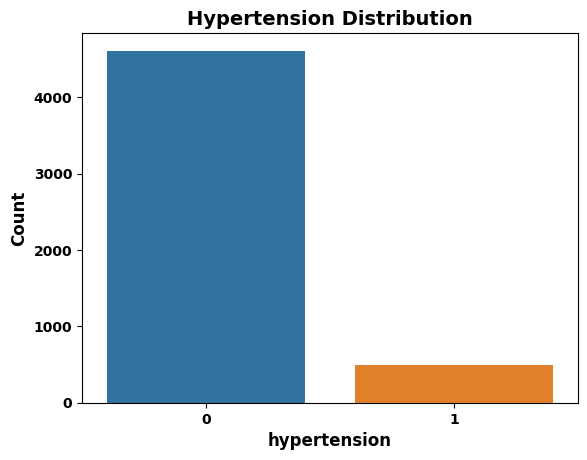

In [26]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='hypertension')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('hypertension', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Hypertension Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

###### Heart Disease

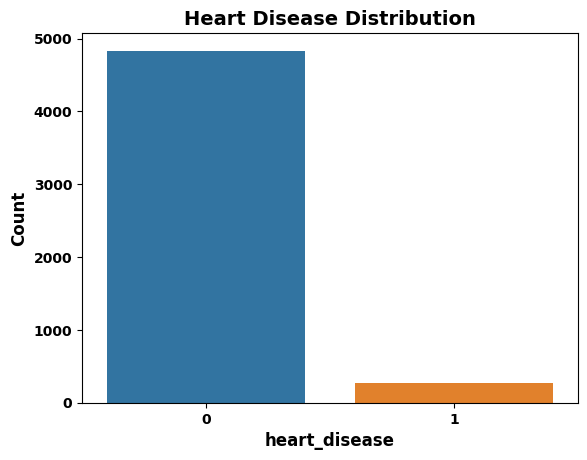

In [27]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='heart_disease')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('heart_disease', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Heart Disease Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

###### **Avg Glucose Level**

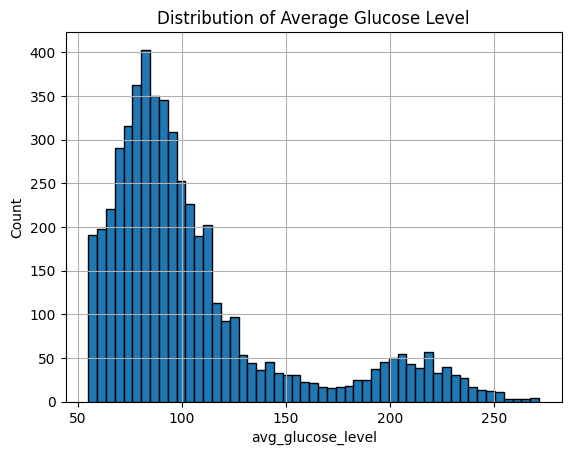

In [28]:
# Histogram of avg_glucose_level
ax = df_stroke['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Average Glucose Level')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('Count');

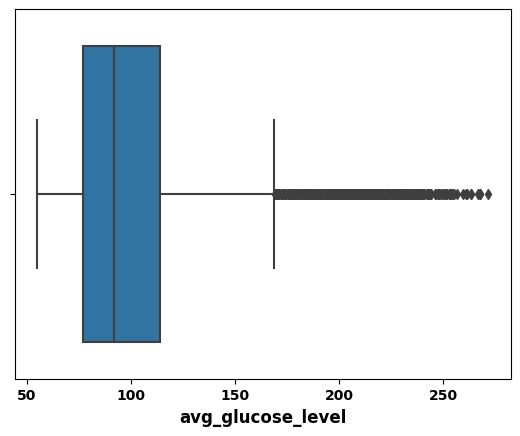

In [29]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'avg_glucose_level')
ax.set_xlabel('avg_glucose_level', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- The distribution of avg glucose level is between around 50 and 165. There are many outliers above the 165/170 values.

###### **BMI**

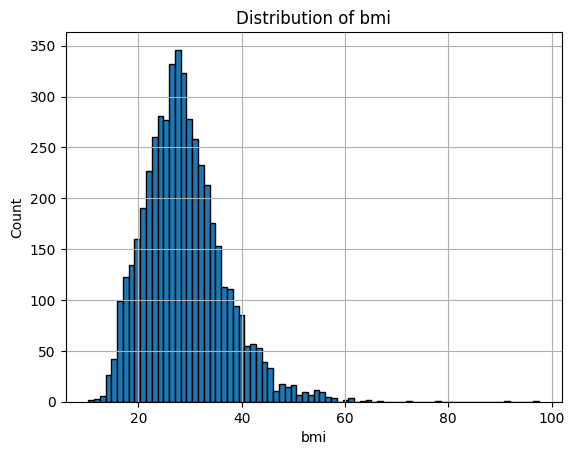

In [30]:
# Histogram of bmi
ax = df_stroke['bmi'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of bmi')
ax.set_xlabel('bmi')
ax.set_ylabel('Count');

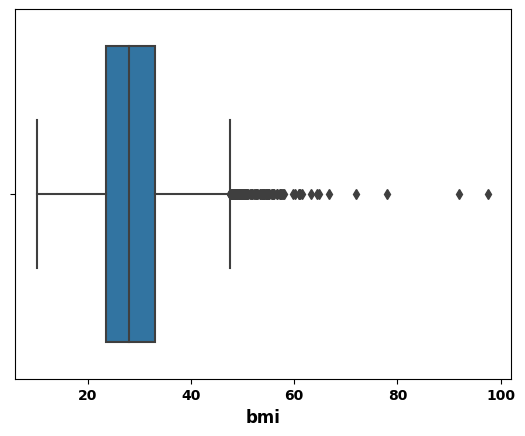

In [31]:
# seaborn box plot for BMI
ax = sns.boxplot(data = df_stroke,
                 x = 'bmi')
ax.set_xlabel('bmi', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

-The distribution of bmi is relatively balanced over the 10 to 60 values. There are very low values or outliers as you approach values over 50.

###### **Stroke 'Target'**

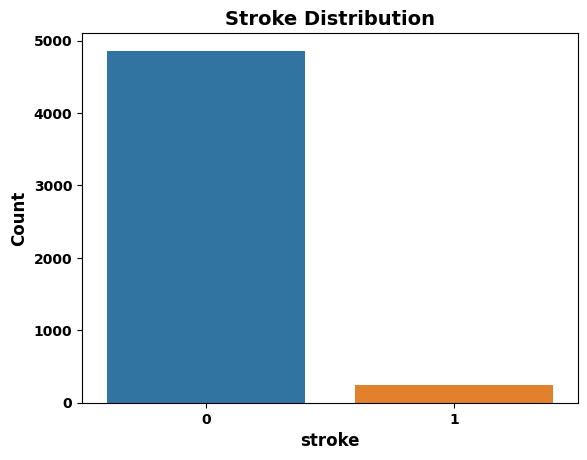

In [32]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='stroke')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('stroke', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Stroke Distribution', fontsize = 14, weight = 'bold');

- We can see that the target that we are trying to predict is unbalanced in favor of 1 which the patient having a stroke. We will have to account for this imbalance in our models

##### Categorical Columns

###### **Gender**

In [33]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

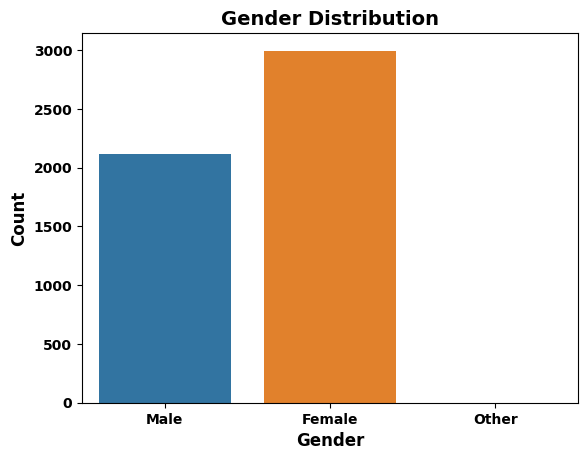

In [34]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='gender')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Gender', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Gender Distribution', fontsize = 14, weight = 'bold');          

###### **Ever Married**

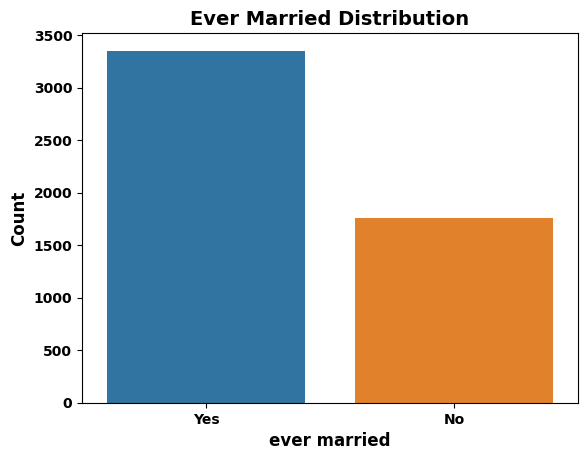

In [35]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='ever_married')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('ever married', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Ever Married Distribution', fontsize = 14, weight = 'bold');  

###### **Work Type**

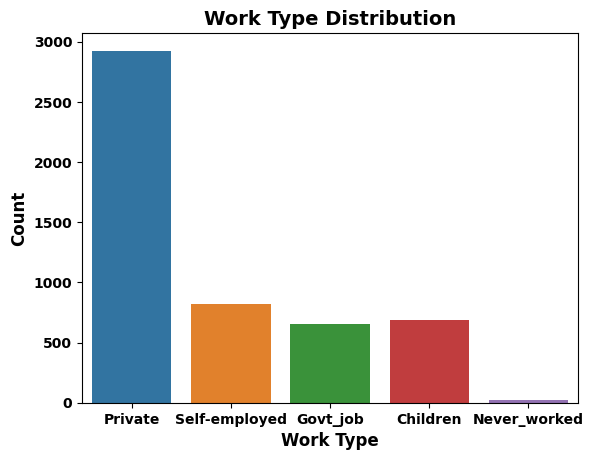

In [36]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='work_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Work Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Work Type Distribution', fontsize = 14, weight = 'bold');  

###### **Residence Type**

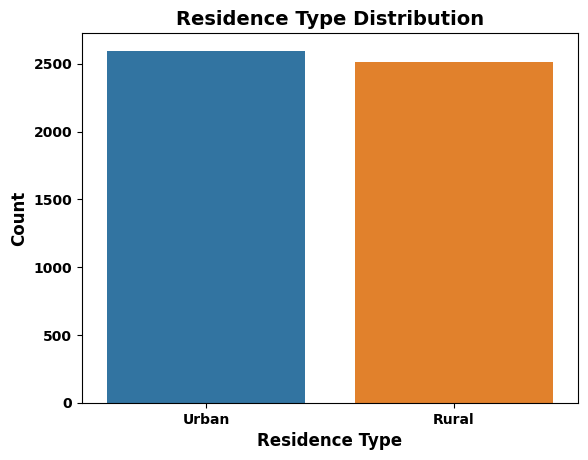

In [37]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='residence_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Residence Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Residence Type Distribution', fontsize = 14, weight = 'bold');  

###### **Smoking Status**

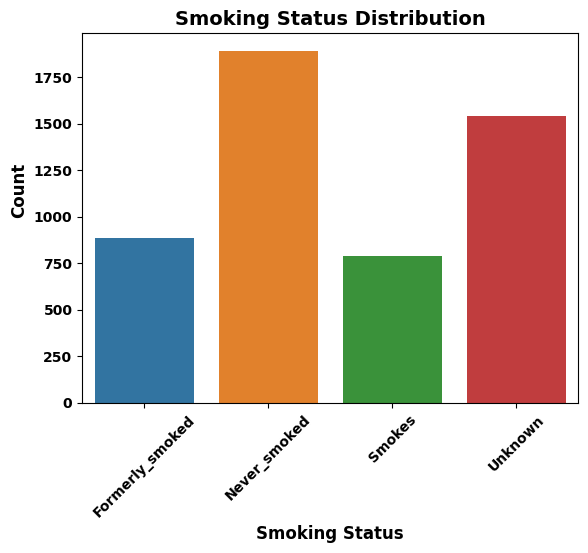

In [38]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='smoking_status')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Smoking Status', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold', ha='left')
plt.xticks(fontsize=10, weight='bold', rotation = 45)
# Set Title
ax.set_title('Smoking Status Distribution', fontsize = 14, weight = 'bold');  

#### Multivariate Models

In [39]:
# Make a dictionary with key and value pairs and to replace values with binary 0 and 1
dict = {"No": 0, "Yes": 1}
df_stroke.replace({'stroke': dict}, inplace = True)
df_stroke.replace({'hypertension': dict}, inplace=True)
df_stroke.replace({'ever_married': dict}, inplace=True)

In [40]:
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

##### Numerical Features

###### Correlation Heat Map

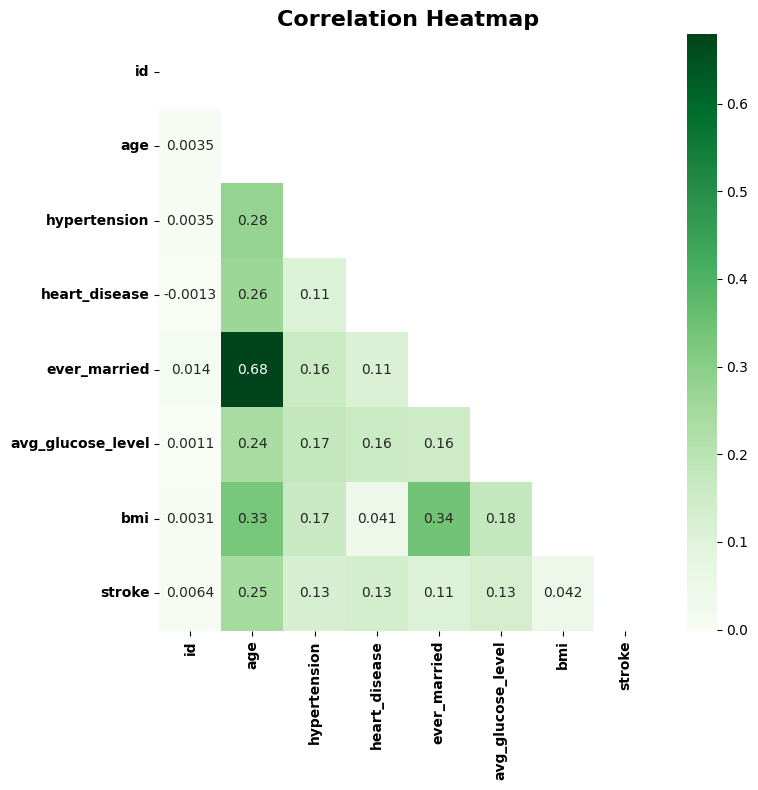

In [41]:
# seaborn heatmap
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (8, 8))
corr = df_stroke.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap= 'Greens', annot = True, mask = mask);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

- Age has the strongest positive correlation to stroke.

###### Bar Plot

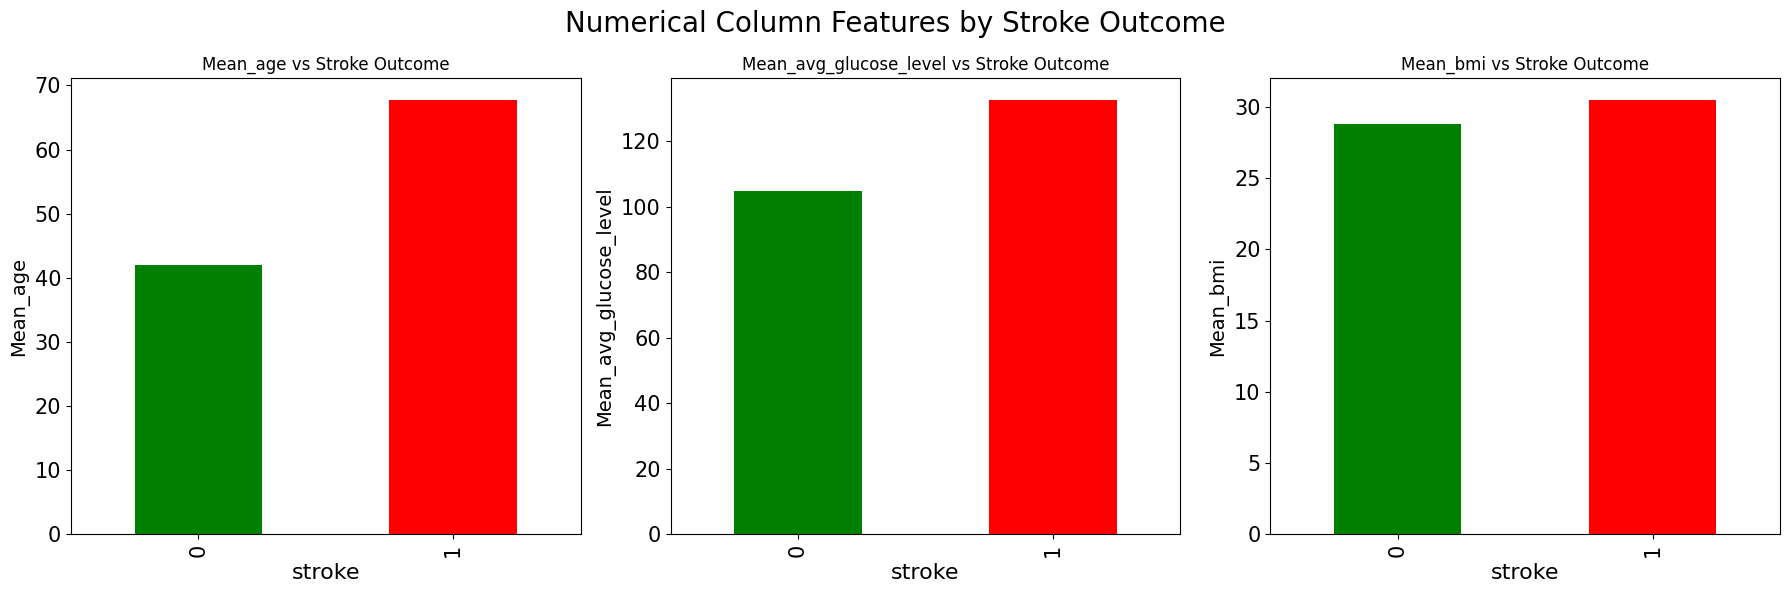

In [42]:
# create side by side plots for numerical float columns grouped with stroke
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
for i, c in enumerate(['age', 'avg_glucose_level', 'bmi',]):
    df_stroke.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('green', 'red'))
    axes[i].set_ylabel(f'Mean_{c}', fontsize=14)
    axes[i].set_xlabel('stroke', fontsize=16)
    axes[i].set_title(f'Mean_{c} vs Stroke Outcome')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
fig.suptitle('Numerical Column Features by Stroke Outcome', size = 20)
plt.tight_layout();

- The first plot shows what we observed in the heatmap. Older people have a higher chance of having strokes.
- The second plot shows that people who have a higher average glucose level are more prone to strokes but the the correlation is not as strong as age.
- The third plot shows that BMI does not have a strong correlation with stroke outcome.

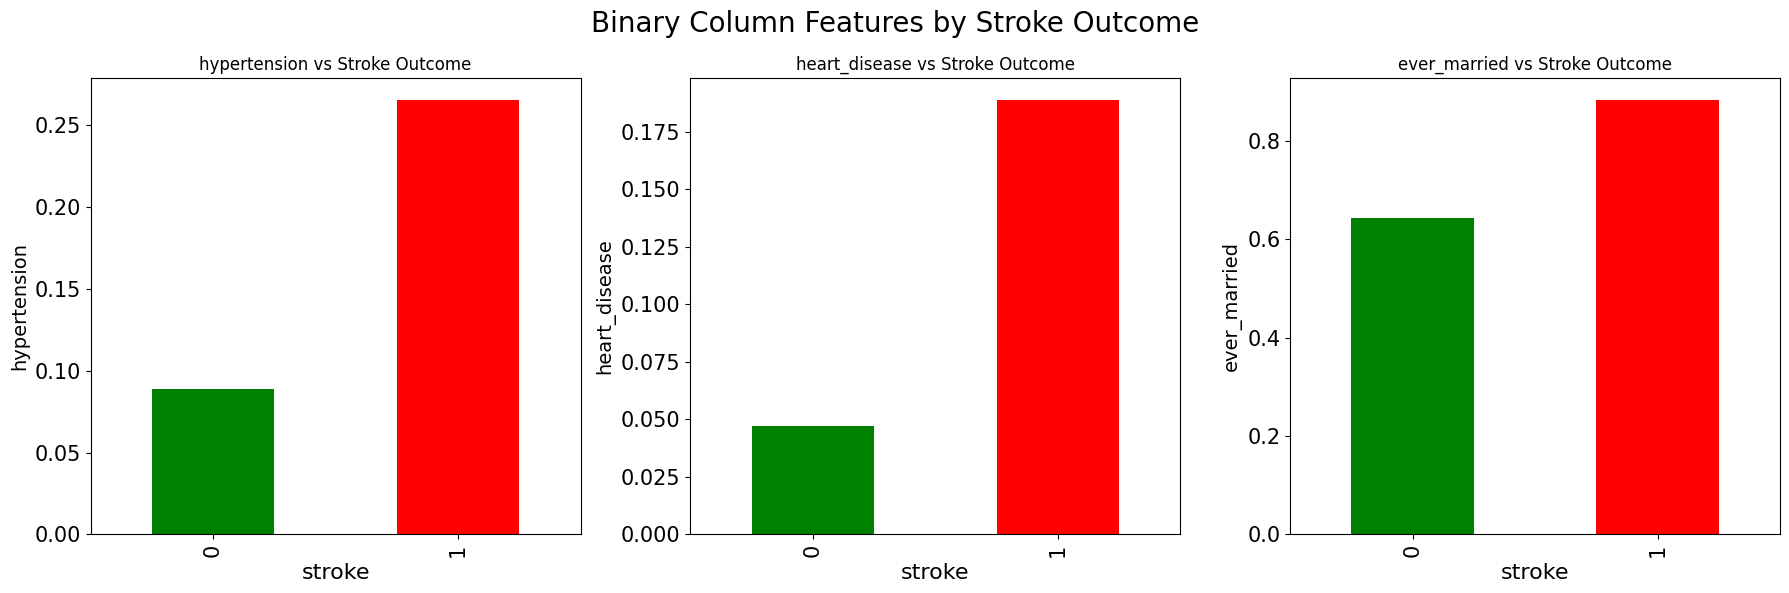

In [45]:
# create side by side plots for numerical float columns grouped with stroke
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
for i, c in enumerate(['hypertension', 'heart_disease', 'ever_married']):
    df_stroke.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('green', 'red'))
    axes[i].set_ylabel(f'{c}', fontsize=14)
    axes[i].set_xlabel('stroke', fontsize=16)
    axes[i].set_title(f'{c} vs Stroke Outcome')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
fig.suptitle('Binary Column Features by Stroke Outcome', size = 20)
plt.tight_layout();

- The barplot shows us that people who have hypertension have a higher incidence of stroke
- People who have heart disease are more likely to have a stroke
- It also appears that people who have never been married have less instance of having strokes.

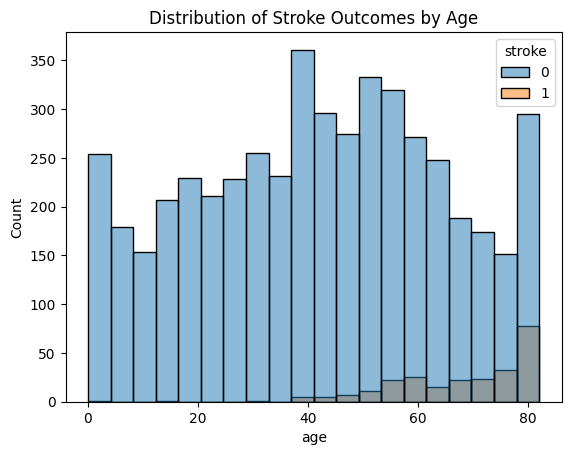

In [46]:
# create seaborn histogram for age distribution with stroke outcome as hue
ax = sns.histplot(data=df_stroke, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of Stroke Outcomes by Age");

###### Histograms

###### Regplot

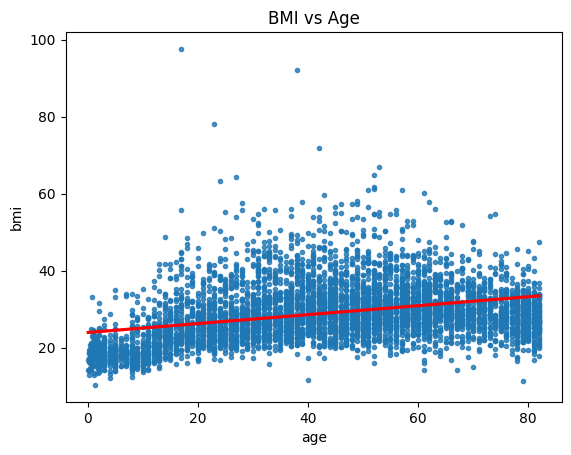

In [65]:
# Look at correlation between age and bmi
ax = sns.regplot(x='age', y='bmi', data= df_stroke, line_kws = {'color' : 'red'}, marker='.').set(title = "BMI vs Age")

- There is a minor positive correlation between BMI and Age

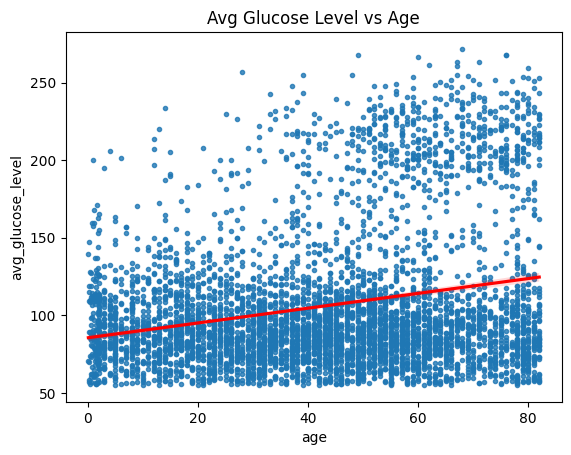

In [64]:
# Look at correlation between age and bmi
ax = sns.regplot(x='age', y='avg_glucose_level', data= df_stroke, line_kws = {'color' : 'red'}, marker='.').set(title = "Avg Glucose Level vs Age")


- There is a also a minor positive correlation between Avg Glucose Level and Age

##### Categorical Features

###### Histograms

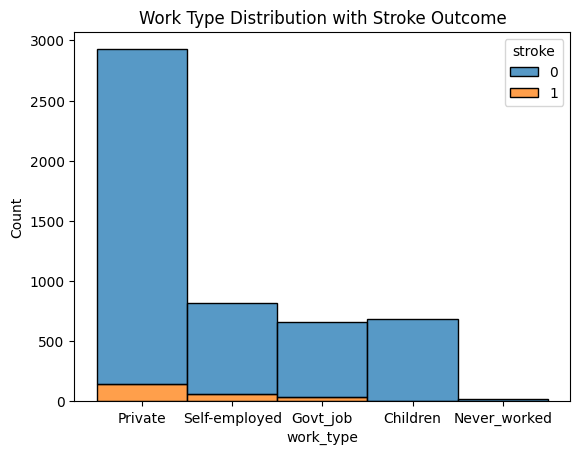

In [59]:
sns.histplot(data=df_stroke, x="work_type", hue="stroke", multiple="stack").set(title = "Work Type Distribution with Stroke Outcome")
plt.show();

- Stroke is more common in people who work

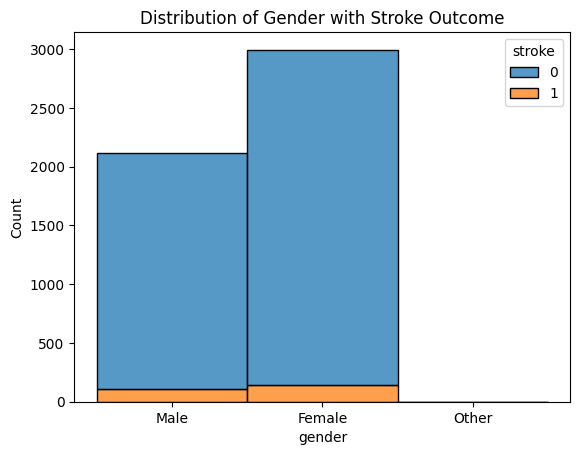

In [66]:
sns.histplot(data=df_stroke, x="gender", hue="stroke", multiple="stack").set(title = "Distribution of Gender with Stroke Outcome")
plt.show();

- Strokes are slightly more common in females than males in this data set.

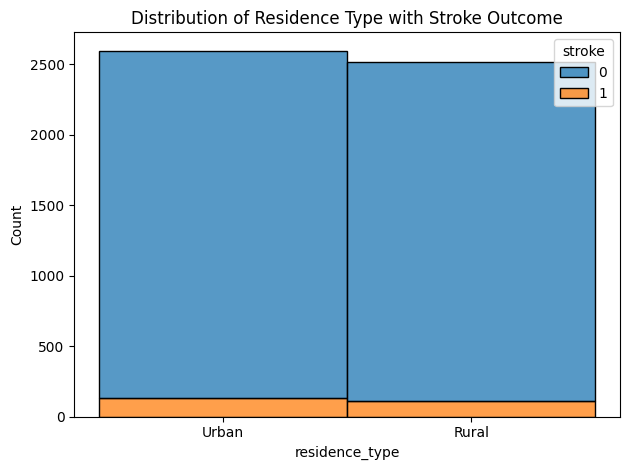

In [86]:
sns.histplot(data=df_stroke, x="residence_type", hue="stroke", multiple="stack").set(title = "Distribution of Residence Type with Stroke Outcome")
plt.tight_layout()
plt.show();

- Stroke outcomes are about the same when looking at residence type.

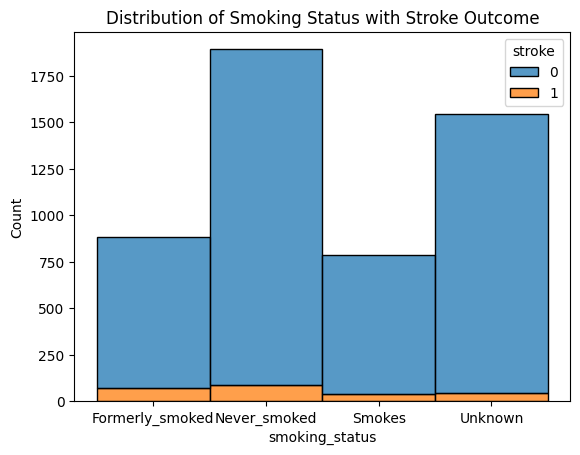

In [87]:
# seaborn histplot for smoking status with stroke outcome
sns.histplot(data=df_stroke, x="smoking_status", hue="stroke", multiple="stack").set(title = "Distribution of Smoking Status with Stroke Outcome")
plt.show();

- Stroke is occuring at about the same rate across people who formerly smoked, never smoked, people who smoke and the unknown category. Looking at this data it is a bit vexing that people who never smoked have a slightly higher rate of having strokes than the other values for smoking status.

### Explanatory Data Analysis

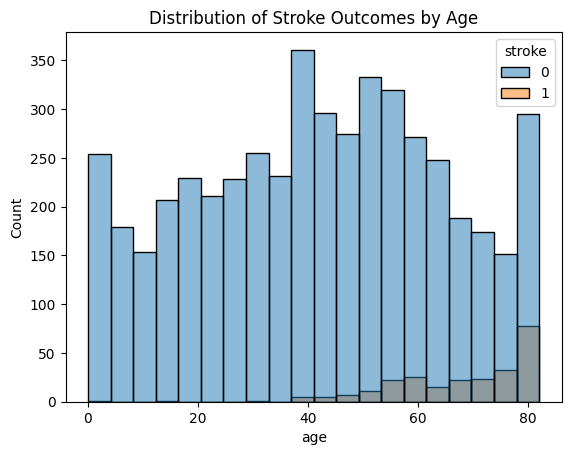

In [54]:
# create seaborn histogram for age distribution with stroke outcome as hue
ax = sns.histplot(data=df_stroke, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of Stroke Outcomes by Age");

- The strongest correlation in stroke outcomes is Age. Using the histogram above we can see that the number of instances of people who are having strokes gets higher around the age of 40 and gets increases as age increase.

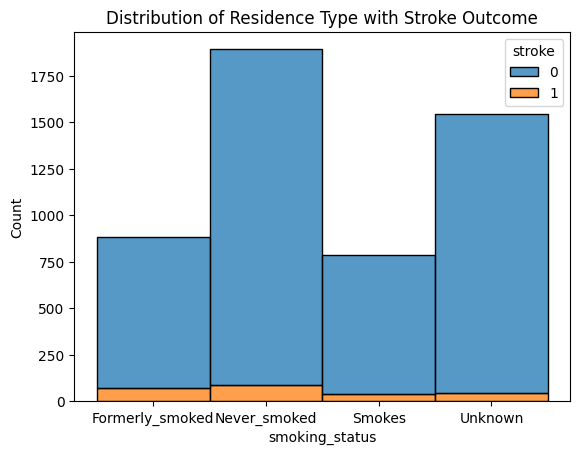

In [88]:
# seaborn histplot for smoking status with stroke outcome
sns.histplot(data=df_stroke, x="smoking_status", hue="stroke", multiple="stack").set(title = "Distribution of Residence Type with Stroke Outcome")
plt.show();

- This plot is very interesting. It is telling us that people who never smoked have a slightly a higher instance of having a stroke. While the stroke outcomes for people who never smoked is not a hugely significant amount over other values it does raise a question that deserves to be looked into. As the data analysis continues I would like to investigate this particular group of non smokers and compare and contrast other features that have led to them having or not having a stroke.